In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, mean_squared_error, r2_score

Linear regression

In [3]:
df = pd.read_csv("/Users/padilr1/Documents/Epi2Tx/normCounts/histone.abundance.csv")
print(df.columns)

Index(['Gene', 'WT_K27me3', 'NSD1KO_K27me3', 'WT_K36me2', 'NSD1KO_K36me2',
       'WT_K36me3', 'NSD1KO_K36me3', 'change_K27me3', 'change_K36me3',
       'change_K36me2', 'LFC_NSD1KO', 'tpm_Parental', 'tpm_NSD1KO',
       'tpm_NSD1wt', 'log10(tpm_Parental)', 'log10(tpm_NSD1KO)'],
      dtype='object')


In [4]:
X = df[['change_K36me2','change_K27me3','change_K36me3']]
Y = df[['LFC_NSD1KO']]

model = LinearRegression()

model.fit(X,Y)

r2 = model.score(X,Y)

print("Intercept: ",model.intercept_)
print("Coefficients: ",model.coef_)
print("R^2: ", r2)

Intercept:  [1.18684447]
Coefficients:  [[ 0.12168465 -0.15130335  1.19056762]]
R^2:  0.6671471298210279


Plot regression

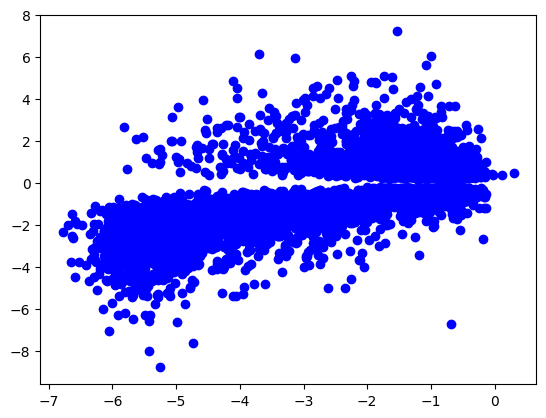

In [5]:
plt.scatter(df['change_K36me2'],df['LFC_NSD1KO'],color='blue')

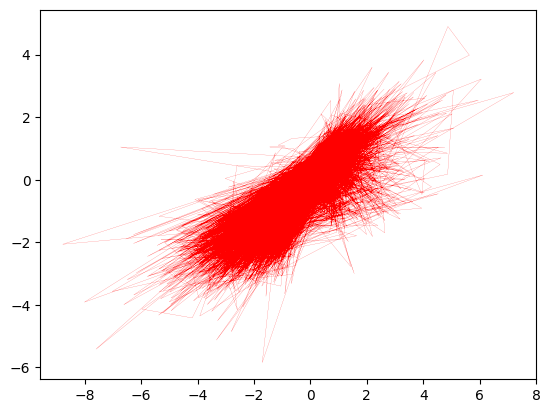

In [6]:
# predict y values for the regression line
y_pred = model.predict(df[['change_K36me2','change_K27me3','change_K36me3']])

plt.plot(df['LFC_NSD1KO'],y_pred,color='red',linewidth=0.1)

In [11]:
histone_abundances = pd.read_csv('/Users/padilr1/Documents/Epi2Tx/normCounts/histone.abundance.csv')
X_dataset = histone_abundances[['WT_K27me3', 'NSD1KO_K27me3', 'WT_K36me2', 'NSD1KO_K36me2', 'WT_K36me3', 'NSD1KO_K36me3']].to_numpy()
Y_dataset = histone_abundances['LFC_NSD1KO'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Evaluate the model
r2_rf_train = r2_score(y_train, rf_model.predict(X_train))
r2_rf_test = r2_score(y_test, rf_model.predict(X_test))

print("Random Forest training R-squared:", r2_rf_train)
print("Random Forest test R-squared:", r2_rf_test)

Random Forest training R-squared: 0.9668578083496683
Random Forest test R-squared: 0.7179678972007869
